# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.
* Observations are placed before each scatter plot

In [1]:
import requests
import json
import api_keys
import random
import time
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import datetime

# create variables for plot label and filename dates
datetoday = datetime.datetime.now().strftime('%d/%m/%y')
datefilename = datetime.datetime.now().strftime('%Y-%m-%d')

# install citypy to utilise below 
from citipy import citipy

## Generate Cities List

In [2]:
#generate cities
# declare counter and max count
ctr = 0
max_ct = 650
city_list = []

while ctr < max_ct:
    # randomise longitude and latitude
    latitude = round(random.uniform(-90.00,90.00),2) 
    longitude = round(random.uniform(-180.00,180.00),2)
    # get city details
    city = citipy.nearest_city(latitude,longitude)

    # prevent duplicate cities in the main list
    if city.city_name not in city_list:
        ctr += 1
        city_list.append(city.city_name)

len(city_list)

650

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# initialise set and record number
set_no = 1
record = 0

# initialise URL
url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_keys.weather_api_key}&units=imperial&q="

# maximum number of records requested excluding missing cities
maxData = 500
 # number of record per minute
recsPerMin=50
# successful request counter
recs_fetched = 0
# proc counter
prc_cntr = 0

# initialise city data directory
city_data = {"City":[],
             "Lat":[],
             "Lng":[],
             "Max Temp":[],
             "Humidity":[],
             "Cloudiness":[],
             "Wind Speed":[],
             "Country":[],
             "Date":[]}

print("Beginning Data Retrieval \n--------------------------------------------------------------")
    
for cty_name in city_list:
    # increment for each call even if city does not exist
    response = requests.get(f"{url}{cty_name}").json()

    # maximum of 60 calls per minute, pause for 1 min after 50 calls
    # separate call counter from record counter to prevent exceeding in case missing city > 10
    if prc_cntr == recsPerMin:
        time.sleep(60)
        prc_cntr = 0
        
    if record == 50:
        #reset record number indicator and increment set number
        record = 0
        set_no += 1

    # if city exists online, process and increment counter
    # using if/else instead of try/catch since try catch will mess up with the counters
    if response['cod'] != '404':
        recs_fetched += 1
        record += 1
        print(f"Processing Record {record} of Set {set_no} | {cty_name}")
        
        # load data to lists
        city_data["City"].append(response["name"])
        city_data["Lat"].append(response["coord"]["lat"])
        city_data["Lng"].append(response["coord"]["lon"])
        city_data["Max Temp"].append(response["main"]["temp_max"])
        city_data["Humidity"].append(response["main"]["humidity"])
        city_data["Cloudiness"].append(response["clouds"]["all"])
        city_data["Wind Speed"].append(response["wind"]["speed"])
        city_data["Country"].append(response["sys"]["country"])
        city_data["Date"].append(response["dt"])
    else:
        # have noticed that the variable values do not reflect if the exception is fired
        # this is to ensure that only 50 records are processed per minute regardless
        # if the record exists or not
        prc_cntr += 1 
        print(f"City not found. Skipping...")
        
    prc_cntr += 1
    
    # if max data is reached, break the loop
    if recs_fetched >= maxData:
        break

print (f"-------------------------------------------------------------- \
       \nData Retrieval Complete - {recs_fetched} records fetched \
       \n--------------------------------------------------------------")

Beginning Data Retrieval 
--------------------------------------------------------------
Processing Record 1 of Set 1 | olinda
Processing Record 2 of Set 1 | talaya
Processing Record 3 of Set 1 | iqaluit
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | san quintin
Processing Record 6 of Set 1 | hobyo
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | okha
Processing Record 9 of Set 1 | vao
Processing Record 10 of Set 1 | talnakh
Processing Record 11 of Set 1 | atuona
Processing Record 12 of Set 1 | rioja
Processing Record 13 of Set 1 | bluff
Processing Record 14 of Set 1 | vestmannaeyjar
Processing Record 15 of Set 1 | boa vista
Processing Record 16 of Set 1 | alofi
Processing Record 17 of Set 1 | constitucion
Processing Record 18 of Set 1 | wahiawa
Processing Record 19 of Set 1 | torbay
Processing Record 20 of Set 1 | hilo
Processing Record 21 of Set 1 | kapaa
Processing Record 22 of Set 1 | bengkulu
City not found. Skipping...
Processing R

Processing Record 40 of Set 4 | saint pete beach
Processing Record 41 of Set 4 | jieshi
Processing Record 42 of Set 4 | ticleni
Processing Record 43 of Set 4 | ucluelet
Processing Record 44 of Set 4 | kalmunai
City not found. Skipping...
Processing Record 45 of Set 4 | mbandaka
Processing Record 46 of Set 4 | yulara
Processing Record 47 of Set 4 | lasa
Processing Record 48 of Set 4 | makakilo city
Processing Record 49 of Set 4 | port hedland
Processing Record 50 of Set 4 | saint-augustin
Processing Record 1 of Set 5 | tuatapere
Processing Record 2 of Set 5 | kavieng
Processing Record 3 of Set 5 | volsk
Processing Record 4 of Set 5 | chapais
Processing Record 5 of Set 5 | korla
Processing Record 6 of Set 5 | camacupa
Processing Record 7 of Set 5 | pouembout
Processing Record 8 of Set 5 | bonavista
Processing Record 9 of Set 5 | joao pessoa
Processing Record 10 of Set 5 | gallup
Processing Record 11 of Set 5 | sola
Processing Record 12 of Set 5 | launceston
Processing Record 13 of Set 5 

Processing Record 30 of Set 8 | taltal
Processing Record 31 of Set 8 | burnie
City not found. Skipping...
Processing Record 32 of Set 8 | boyolali
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 33 of Set 8 | manjeshwar
Processing Record 34 of Set 8 | coro
Processing Record 35 of Set 8 | beloha
Processing Record 36 of Set 8 | kampot
Processing Record 37 of Set 8 | dawei
Processing Record 38 of Set 8 | marystown
Processing Record 39 of Set 8 | metro
Processing Record 40 of Set 8 | huallanca
Processing Record 41 of Set 8 | mackay
Processing Record 42 of Set 8 | tiguha
Processing Record 43 of Set 8 | bilma
City not found. Skipping...
Processing Record 44 of Set 8 | cabo san lucas
Processing Record 45 of Set 8 | ejutla de crespo
Processing Record 46 of Set 8 | mungaoli
Processing Record 47 of Set 8 | dalvik
Processing Record 48 of Set 8 | eirunepe
City not found. Skipping...
Processing Record 49 of Set 8 | schoningen
City not found. Ski

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_df = pd.DataFrame(city_data)
weather_df.to_csv("../output_data/cities.csv", index=False, header=True)
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Olinda,-8.0089,-34.8553,80.60,65,75,9.22,BR,1610665563
1,Talaya,61.3833,152.7500,-38.15,79,100,0.63,RU,1610665563
2,Iqaluit,63.7506,-68.5145,-13.00,77,20,5.75,CA,1610665564
3,Ushuaia,-54.8000,-68.3000,53.60,58,20,10.36,AR,1610665475
4,San Quintín,30.4833,-115.9500,69.69,34,0,6.55,MX,1610665564


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,5.000000e+02
mean,21.565737,12.325066,47.982680,75.352000,53.722000,7.525000,1.610666e+09
std,33.498580,92.404448,33.016623,18.729701,39.052053,5.652221,2.532363e+02
min,-54.800000,-175.200000,-50.260000,11.000000,0.000000,0.070000,1.610665e+09
25%,-6.525375,-68.784350,31.207500,67.000000,11.750000,3.440000,1.610666e+09
50%,27.996950,17.713750,57.595000,80.000000,70.000000,5.750000,1.610666e+09
75%,50.138975,95.523775,75.570000,88.000000,90.000000,10.090000,1.610666e+09
max,78.218600,178.416700,89.600000,100.000000,100.000000,36.820000,1.610666e+09


In [6]:
#  Get the indices of cities that have humidity over 100%.
# [RS] - I'd prefer to automate the checks :)
weather_df_outliers = []
if weather_df['Humidity'].max() > 100:
    weather_df_outliers = weather_df.loc[weather_df['Humidity'] > 90].index

weather_df_outliers

[]

In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_df[~weather_df.index.isin(weather_df_outliers)]
len(clean_city_data)

500

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

#### OBSERVATIONS:
* Considering the data to be concentrated more on Northern Latitude there is a close correlation to drop in temperature as the city moves away from the equator. 
* Given the results of the sample, if I am to enhance this analysis I'd rather get the positive and negaive latitude values for a single longitude and ensure that both the positive and negative latitude cities have weather data, then I'll do the analysis and plotting from there.

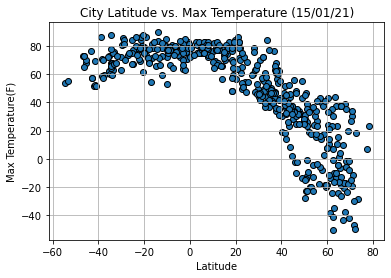

In [8]:
# Bonus - create a function for the scatter plots
def create_plot(x_values,y_values,title,x_label,y_label,filename,islinear):
    # create scatter plot
    if not islinear:
        # create scatter plot with specific formatting
        plt.scatter(x_values,y_values,edgecolors="black")
        plt.title(f'{title} ({datetoday})')
        # add grid
        plt.grid()
    else:
        # create scatter plot
        plt.scatter(x_values,y_values)
        # calculate line variables
        (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
        # calculate regress values
        regress_values = x_values * slope + intercept
        # add line and equation
        plt.plot(x_values,regress_values,"r-")
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        plt.annotate(line_eq,(min(x_values),min(y_values)+5),fontsize=15,color="red")
        print(f"The r-value is {rvalue}")

    # add labels
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    # save figure
    plt.savefig(f"../output_data/{filename} {datefilename}.png")
    # print visualisation
    plt.show()

# function call for City Latitude vs. Max Temperature
create_plot(clean_city_data['Lat'],
            clean_city_data['Max Temp'],
            'City Latitude vs. Max Temperature',
            'Latitude',
            'Max Temperature(F)',
            'City Latitude vs. Max Temperature',
            False)

## Latitude vs. Humidity Plot

#### OBSERVATIONS:
* For this data there seems to be a concentration of high humidity on the northern latitude although there is not much of a correlation with the acquired dataset. It would be interesting to see an equal amount of citis in the >-40 latitude perhaps it could show more corellation. 

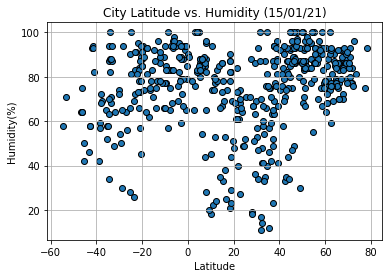

In [9]:
# function call for City Latitude vs. Humidity
create_plot(clean_city_data['Lat'],
            clean_city_data['Humidity'],
            'City Latitude vs. Humidity',
            'Latitude',
            'Humidity(%)',
            'City Latitude vs. Humidity',
            False)

## Latitude vs. Cloudiness Plot

#### OBSERVATIONS:
* There seems to be a concentration between 70% to 100% cloudiness but not much correlation, would be interesting to compare data from different days or seasons.

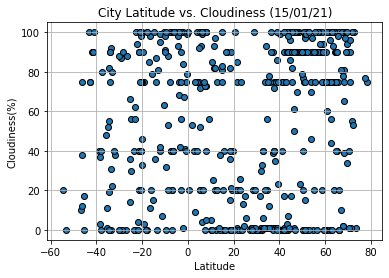

In [10]:
# function call for City Latitude vs. Cloudiness
create_plot(clean_city_data['Lat'],
            clean_city_data['Cloudiness'],
            'City Latitude vs. Cloudiness',
            'Latitude',
            'Cloudiness(%)',
            'City Latitude vs. Cloudiness',
            False)

## Latitude vs. Wind Speed Plot

#### OBSERVATIONS:
* Again onsidering the data to be concentrated more on Northern Latitude the correlation seepms to be consistent between wind speed and latitude with a high concentration between 0 and 10. One interesting observation in this data is all of the chosen cities seem to have a fair to moderately windy weather and no storms.

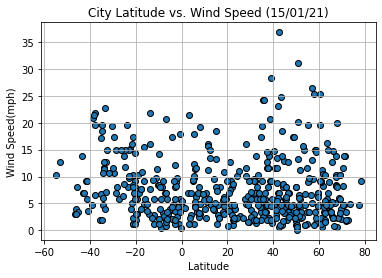

In [11]:
# function call for City Latitude vs. Wind Speed
create_plot(clean_city_data['Lat'],
            clean_city_data['Wind Speed'],
            'City Latitude vs. Wind Speed',
            'Latitude',
            'Wind Speed(mph)',
            'City Latitude vs. Wind Speed',
            False)

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

#### OBSERVATIONS:
* There is a strong negative correlation between northern hemishpere latitude and maximum temperature - maximum temperature drops as the city moves up further from the equator. 

The r-value is -0.8436349748907425


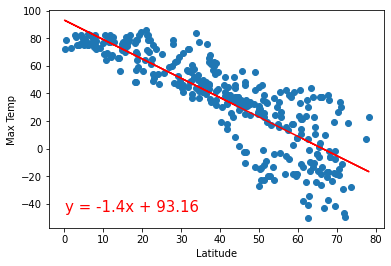

In [23]:
# function call for City Latitude Northern Hemisphere vs. Temperature
create_plot(clean_city_data.loc[clean_city_data['Lat'] >= 0]['Lat'],
            clean_city_data.loc[clean_city_data['Lat'] >= 0]['Max Temp'],
            '',
            'Latitude',
            'Max Temp',
            'Linear Regression - Northern Hemisphere - Max Temp vs. Latitude',
            True)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

#### OBSERVATIONS:
* There is a positive correlation between southern hemishpere latitude and maximum temperature - maximum temperature drops as the city moves closer to the equator.

The r-value is 0.4175959576393526


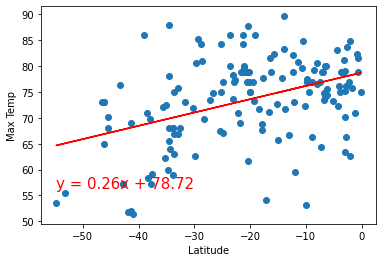

In [24]:
# function call for City Latitude Southern Hemisphere vs. Temperature
create_plot(clean_city_data.loc[clean_city_data['Lat'] < 0]['Lat'],
            clean_city_data.loc[clean_city_data['Lat'] < 0]['Max Temp'],
            '',
            'Latitude',
            'Max Temp',
            'Linear Regression - Southern Hemisphere - Max Temp vs. Latitude',
            True)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

#### OBSERVATIONS:
* There is a weak positive correlation between northern latitude and humidity although on a visual inspection it virtually is more of a zero corellation with concentration of high humidity on cities further north. 

The r-value is 0.2987126191278126


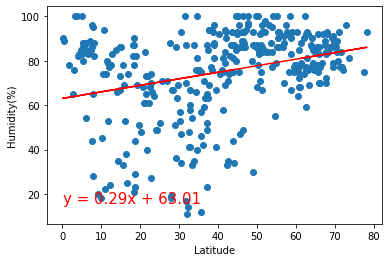

In [25]:
# function call for City Latitude Northern Hemisphere vs. Humidity
create_plot(clean_city_data.loc[clean_city_data['Lat'] >= 0]['Lat'],
            clean_city_data.loc[clean_city_data['Lat'] >= 0]['Humidity'],
            '',
            'Latitude',
            'Humidity(%)',
            'Linear Regression - Northern Hemisphere - Humidity vs. Latitude',
            True)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

#### OBSERVATIONS:
* There is a moderate positive correlation from southern hemisphere latitude vs humidity.

The r-value is 0.3988387909440392


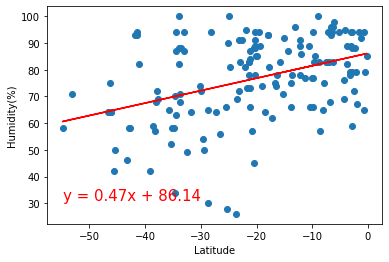

In [26]:
# function call for City Latitude Southern Hemisphere vs. Humidity
create_plot(clean_city_data.loc[clean_city_data['Lat'] < 0]['Lat'],
            clean_city_data.loc[clean_city_data['Lat'] < 0]['Humidity'],
            '',
            'Latitude',
            'Humidity(%)',
            'Linear Regression - Southern Hemisphere - Humidity vs. Latitude',
            True)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

#### OBSERVATIONS:
* There is a moderate positive correlation between cloudiness and latitude in the northern hemisphere but there is a heavy distribution on 100% and 0% values. 

The r-value is 0.2219692115542956


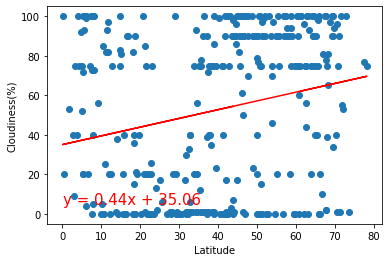

In [27]:
# function call for City Latitude Northern Hemisphere vs. Cloudiness
create_plot(clean_city_data.loc[clean_city_data['Lat'] >= 0]['Lat'],
            clean_city_data.loc[clean_city_data['Lat'] >= 0]['Cloudiness'],
            '',
            'Latitude',
            'Cloudiness(%)',
            'Linear Regression - Northern Hemisphere - Cloudiness vs. Latitude',
            True)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

#### OBSERVATIONS:
* There is a moderate positive correlation between cloudiness and latitude in the southern hemisphere. 

The r-value is 0.2729648592430641


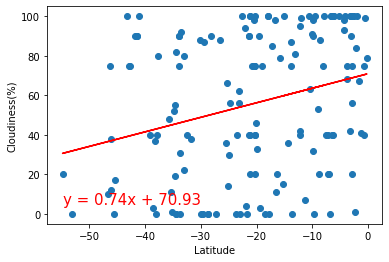

In [28]:
# function call for City Latitude Southern Hemisphere vs. Cloudiness
create_plot(clean_city_data.loc[clean_city_data['Lat'] < 0]['Lat'],
            clean_city_data.loc[clean_city_data['Lat'] < 0]['Cloudiness'],
            '',
            'Latitude',
            'Cloudiness(%)',
            'Linear Regression - Southern Hemisphere - Cloudiness vs. Latitude',
            True)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

#### OBSERVATIONS:
* There is barely any correlation between wind speed and latitude in the northern hemisphere. 

The r-value is 0.00694553497955728


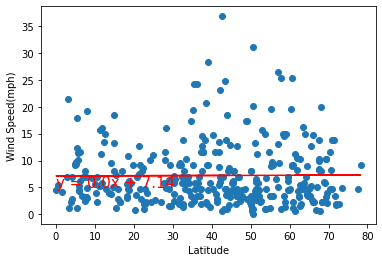

In [29]:
# function call for City Latitude Northern Hemisphere vs. Wind Speed
create_plot(clean_city_data.loc[clean_city_data['Lat'] >= 0]['Lat'],
            clean_city_data.loc[clean_city_data['Lat'] >= 0]['Wind Speed'],
            '',
            'Latitude',
            'Wind Speed(mph)',
            'Linear Regression - Northern Hemisphere - Wind Speed vs. Latitude',
            True)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

#### OBSERVATIONS:
* There is a negative correlation between wind speed and latitude in the southern hemisphere. 

The r-value is -0.28479778484482704


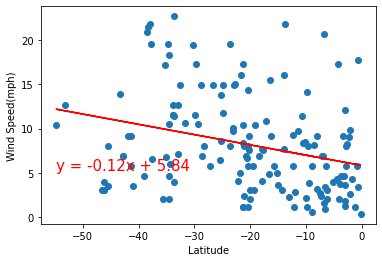

In [30]:
# function call for City Latitude Southern Hemisphere vs. Wind Speed
create_plot(clean_city_data.loc[clean_city_data['Lat'] < 0]['Lat'],
            clean_city_data.loc[clean_city_data['Lat'] < 0]['Wind Speed'],
            '',
            'Latitude',
            'Wind Speed(mph)',
            'Linear Regression - Southern Hemisphere - Wind Speed vs. Latitude',
            True)